# Generate distribution visuals for features

In [1]:
# !pip install selenium
# !brew install chromedriver

In [2]:
# import
import json
import pandas as pd
import altair as alt

alt.renderers.enable('mimetype')
from IPython.display import Image
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

In [3]:
# load data
with open('../data/train_features.json', 'r') as f:
    train_feat = json.load(f)
with open('../data/val_features.json', 'r') as f:
    val_feat = json.load(f)
with open('../data/test_features.json', 'r') as f:
    test_feat = json.load(f)
    
train_feat_df = pd.DataFrame(train_feat)
val_feat_df = pd.DataFrame(val_feat)
test_feat_df = pd.DataFrame(test_feat)

In [4]:
# concatenate all data into one table
corpus_feat_df = train_feat_df.append(val_feat_df, ignore_index=True).append(test_feat_df, ignore_index=True)

In [5]:
corpus_feat_df.head()

preprocessed_text  total_tokens  \
0  ¡estoy encantada! desde esta mañana respiro el...          2585   
1  era un mañana a fines del mes de abril. el bue...          1539   
2  a mi perro curro le gusta pasear por el parque...           159   
3  en la ribera ven, sigue de la mano al que te a...           291   
4  la vuelta a la patria mirad al peregrino10 ¡cu...           401   

   total_tokens_w/o_stopwords  avg_sent_length  proportion_of_A_level_tokens  \
0                        1118        35.410959                      0.339893   
1                         622        14.941748                      0.326367   
2                          70        22.714286                      0.557143   
3                         117        22.384615                      0.307692   
4                         193        21.105263                      0.295337   

   proportion_of_A_level_types  num_connectives  logical_operator_density  \
0                     0.182550               18                  0.050386   
1                     0.214612               18                  0.034970   
2                     0.395833                7                  0.039216   
3                     0.250000                9                  0.043011   
4                     0.231250                5                  0.046997   

   pronoun_density  type_token_ratio  ...     PUNCT     SCONJ       SYM  \
0         0.047407          0.360155  ...  0.109865  0.032882  0.000000   
1         0.067268          0.388564  ...  0.152697  0.038337  0.005198   
2         0.143885          0.578616  ...  0.075472  0.025157  0.000000   
3         0.024648          0.580756  ...  0.189003  0.034364  0.000000   
4         0.028205          0.551122  ...  0.164589  0.022444  0.000000   

       VERB    X  EOL     SPACE   CONTENT  FUNCTION  level  
0  0.078530  0.0  0.0  0.000000  0.635376  0.364624      B  
1  0.107862  0.0  0.0  0.000000  0.621914  0.378086      B  
2  0.169811  0.0  0.0  0.000000  0.673469  0.326531     A2  
3  0.089347  0.0  0.0  0.003436  0.629787  0.370213      B  
4  0.109726  0.0  0.0  0.004988  0.654655  0.345345      B  

[5 rows x 46 columns]

In [16]:
def get_visuals_for(features):
    '''
    Save altair visualizations of the given features to disk.
    
    Input:
    features: (str) a list of column names in the dataframe `corpus_feat_df`
    
    Return:
    None
    '''
    for feature in features:
        chart = alt.Chart(corpus_feat_df, title = f'{feature} Distribution by Text Level').transform_density(
            f'{feature}', groupby=['level'], as_=[f'{feature}', 'density']).mark_area(
            interpolate='monotone', opacity = 0.7).encode(
            x = alt.X(f'{feature}', title = f'{feature}'), y = alt.Y('density:Q', title = 'Density'), color = 'level')
        display(chart)
        
        # to save in png format, altair requires additional dependencies: see https://iliatimofeev.github.io/altair-viz.github.io/user_guide/saving_charts.html
        # !pip install selenium
        # !brew install chromedriver
        if '/' in feature:
            feature = ''.join([letter for letter in feature if letter != '/'])
        chart.save(f'../visuals/{feature}.png')

In [17]:
# change here to get the graphs
features = ['total_tokens', 'total_tokens_w/o_stopwords', 
            'avg_sent_length', 'proportion_of_A_level_tokens', 
            'proportion_of_A_level_types']

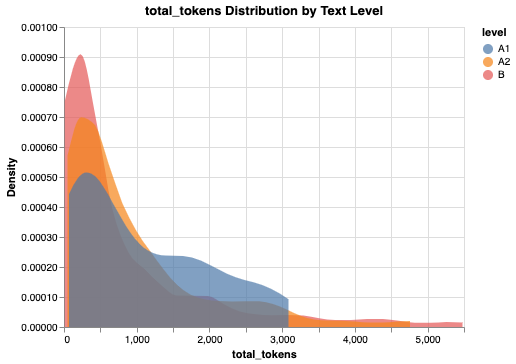

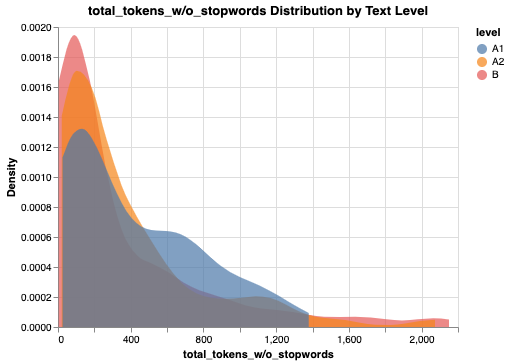

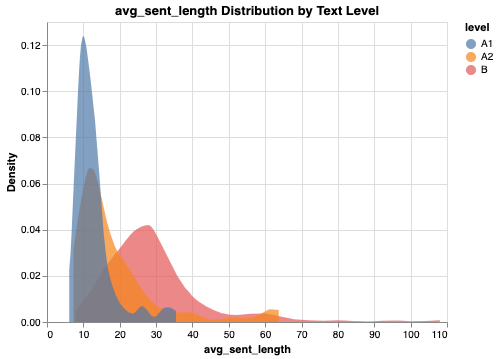

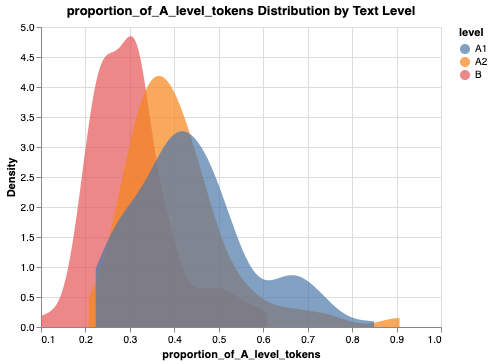

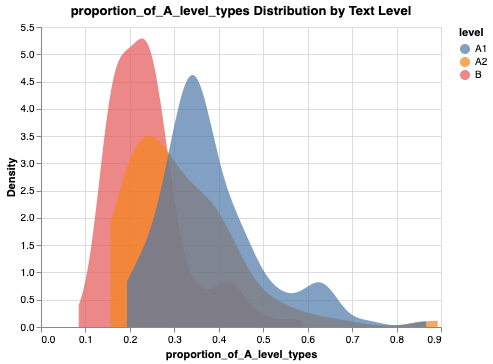

In [18]:
get_visuals_for(features)